<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-sivani/Optiver_stock_closing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
# SDAI CSCE 5214

## Dataset: Optiver stock closing price

Description:

In the last ten minutes of the Nasdaq exchange trading session, market makers like Optiver merge traditional order book data with auction book data. This ability to consolidate information from both sources is critical for providing the best prices to all market participants.

In this competition, you are challenged to develop a model capable of predicting the closing price movements for hundreds of Nasdaq listed stocks using data from the order book and the closing auction of the stock. Information from the auction can be used to adjust prices, assess supply and demand dynamics, and identify trading opportunities.

kaggle link: https://www.kaggle.com/competitions/optiver-trading-at-the-close



In [9]:
# Importing Libraries

# Data Collection
from google.colab import drive

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns



---


Data Collection

In [3]:
# Getting data saved in drive

# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')

# Data Analysis

In [11]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB
None


In [7]:
df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [12]:
# Null Values

df.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [20]:
rows_with_missing_target = df[df['target'].isna()]

# Print the extracted rows
rows_with_missing_target

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1925,35_0_131
369700,131,35,10,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1926,35_10_131
369892,131,35,20,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1927,35_20_131
370084,131,35,30,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1928,35_30_131
370276,131,35,40,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1929,35_40_131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225338,158,388,510,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21391,388_510_158
4225538,158,388,520,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21392,388_520_158
4225738,158,388,530,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21393,388_530_158
4225938,158,388,540,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21394,388_540_158


In [21]:
set(rows_with_missing_target.stock_id.unique())

{19, 101, 131, 158}

In [22]:
set(df[df['imbalance_size'].isna()].stock_id.unique())

{19, 101, 131, 158}

imbalance_size -> depends on reference price -> depends on ask/bid price
['imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'ask_price', 'wap'] all are related and are missing mostly for the same stock

Only 4 stocks have missing target values.

These 3 stocks have missing ask, bid and other missing features.

Selecting stock no. 52 for analysis

### Data Pre-processing

In [23]:
# selecting stock no. 52

stock_52 = df[df['stock_id'] == 52]

Statistics

In [29]:
stock_52.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,26455.0,26455.000000,26455.000000,2.645500e+04,26455.000000,26455.000000,2.645500e+04,11862.000000,12025.000000,26455.000000,26455.000000,26455.000000,2.645500e+04,26455.000000,26455.000000,26455.000000
mean,52.0,240.000000,270.000000,1.699169e+06,-0.004952,0.999857,1.124336e+07,0.999018,0.999357,0.999638,20964.674511,1.000083,2.245383e+04,0.999855,-0.267957,13227.000000
std,0.0,138.855064,158.748079,5.780928e+06,0.880137,0.002014,2.602365e+07,0.019145,0.010743,0.001997,26463.411029,0.001986,2.879619e+04,0.001996,7.475520,7637.045022
min,52.0,0.000000,0.000000,0.000000e+00,-1.000000,0.985837,7.869713e+05,0.822301,0.918404,0.985475,89.830000,0.986795,8.986000e+01,0.986307,-118.889810,0.000000
25%,52.0,120.000000,130.000000,4.927787e+04,-1.000000,0.998863,4.529822e+06,0.996729,0.997300,0.998682,3823.525000,0.999104,4.470280e+03,0.998884,-4.259944,6613.500000
50%,52.0,240.000000,270.000000,6.100030e+05,0.000000,0.999926,6.962677e+06,0.999762,0.999770,0.999711,12455.870000,1.000154,1.330375e+04,0.999954,-0.180006,13227.000000
75%,52.0,360.000000,410.000000,1.668496e+06,1.000000,1.000969,1.029906e+07,1.002735,1.002174,1.000726,27678.895000,1.001170,2.978696e+04,1.000945,3.759861,19840.500000
max,52.0,480.000000,540.000000,1.333038e+08,1.000000,1.008990,4.796631e+08,1.279803,1.099612,1.008729,404334.800000,1.009077,1.070635e+06,1.008758,174.200530,26454.000000


In [30]:
stock_52.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26455 entries, 52 to 5237832
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 26455 non-null  int64  
 1   date_id                  26455 non-null  int64  
 2   seconds_in_bucket        26455 non-null  int64  
 3   imbalance_size           26455 non-null  float64
 4   imbalance_buy_sell_flag  26455 non-null  int64  
 5   reference_price          26455 non-null  float64
 6   matched_size             26455 non-null  float64
 7   far_price                11862 non-null  float64
 8   near_price               12025 non-null  float64
 9   bid_price                26455 non-null  float64
 10  bid_size                 26455 non-null  float64
 11  ask_price                26455 non-null  float64
 12  ask_size                 26455 non-null  float64
 13  wap                      26455 non-null  float64
 14  target             

Analyzing by time and date

In [24]:
stock_52.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
52,52,0,0,1589228.95,-1,1.000204,7052889.31,NaN,NaN,0.999701,12162.48,1.000120,4890.89,1.000000,1.000166,0,0_0_52
243,52,0,10,1321097.26,-1,1.000791,7321021.00,NaN,NaN,1.000707,238.72,1.001042,35939.40,1.000709,-7.659793,1,0_10_52
434,52,0,20,1321097.26,-1,1.000707,7321021.00,NaN,NaN,1.000623,26376.35,1.000959,43219.18,1.000750,-5.499721,2,0_20_52
625,52,0,30,1285314.56,-1,1.000707,7356803.70,NaN,NaN,1.000623,26495.70,1.001042,10507.20,1.000923,-12.689829,3,0_30_52
816,52,0,40,1302609.53,-1,1.000875,7367299.96,NaN,NaN,1.000791,596.85,1.001042,10746.00,1.000804,-8.109808,4,0_40_52


In [25]:
# No. of days tracked for stock 52
days = len(set(stock_52.date_id.unique()))
print("Days:", days)

Days: 481


In [27]:
# Sorting data by date_id and time_id
stock_52 = stock_52.copy()
stock_52.sort_values(by=['date_id', 'time_id'], inplace=True)


In [29]:
stock_52.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,52,0,0,1589228.95,-1,1.000204,7052889.31,NaN,NaN,0.999701,12162.48,1.000120,4890.89,1.000000,1.000166,0,0_0_52
1,52,0,10,1321097.26,-1,1.000791,7321021.00,NaN,NaN,1.000707,238.72,1.001042,35939.40,1.000709,-7.659793,1,0_10_52
2,52,0,20,1321097.26,-1,1.000707,7321021.00,NaN,NaN,1.000623,26376.35,1.000959,43219.18,1.000750,-5.499721,2,0_20_52
3,52,0,30,1285314.56,-1,1.000707,7356803.70,NaN,NaN,1.000623,26495.70,1.001042,10507.20,1.000923,-12.689829,3,0_30_52
4,52,0,40,1302609.53,-1,1.000875,7367299.96,NaN,NaN,1.000791,596.85,1.001042,10746.00,1.000804,-8.109808,4,0_40_52


### Feature Engineering

In [30]:
# Create 'Minute of the Day' feature in 'stock_52'
stock_52['minute_of_day'] = stock_52['seconds_in_bucket'] // 60  # Convert seconds to minutes

# Create 'Day of the Week' feature based on relative day numbers in 'stock_52'
stock_52['day_of_week'] = (stock_52['date_id'] - stock_52['date_id'].min()) % 7

# Print the updated 'stock_52' DataFrame to see the new features
print(stock_52[['date_id', 'seconds_in_bucket', 'minute_of_day', 'day_of_week']])

       date_id  seconds_in_bucket  minute_of_day  day_of_week
0            0                  0              0            0
1            0                 10              0            0
2            0                 20              0            0
3            0                 30              0            0
4            0                 40              0            0
...        ...                ...            ...          ...
26450      480                500              8            4
26451      480                510              8            4
26452      480                520              8            4
26453      480                530              8            4
26454      480                540              9            4

[26455 rows x 4 columns]


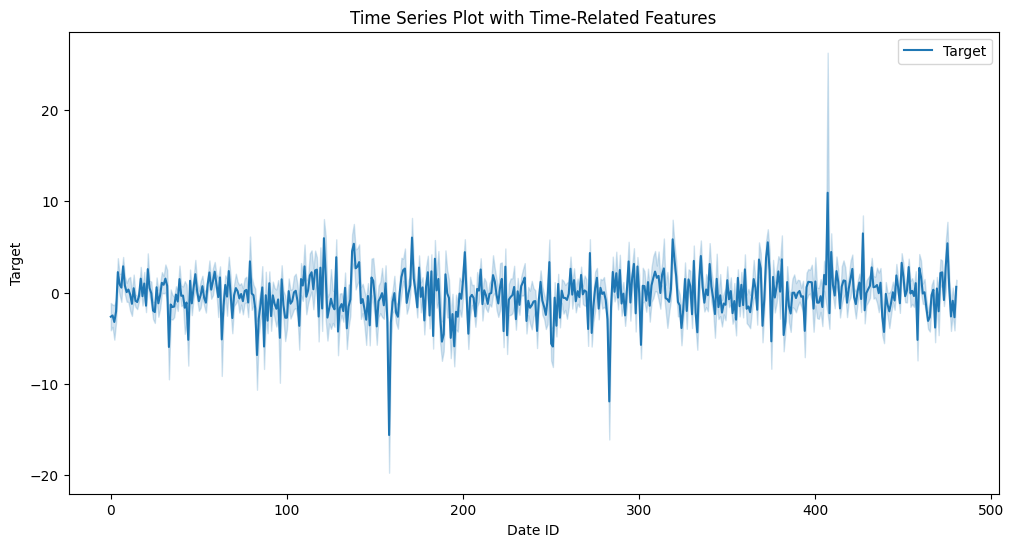

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stock_52' is your DataFrame with the new features

# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_52, x='date_id', y='target', label='Target')


plt.title('Time Series Plot with Time-Related Features')
plt.xlabel('Date ID')
plt.ylabel('Target')
plt.legend()
plt.show()


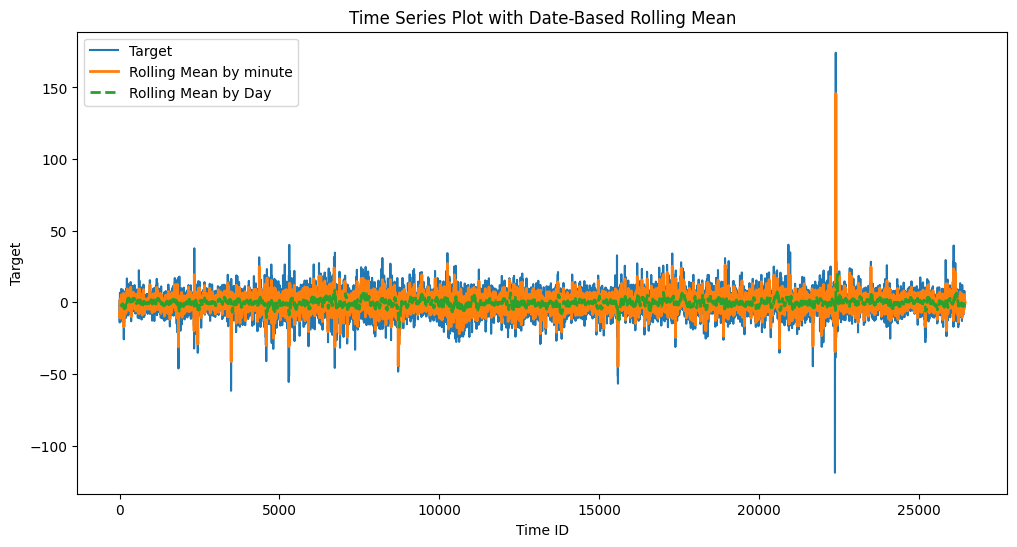

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stock_52' is your DataFrame with the new features

# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_52, x='time_id', y='target', label='Target')

# Calculate rolling statistics with rolling window size based on 'date_id' groups
rolling_window_size = 54
rolling_window = stock_52.set_index('time_id').rolling(window=rolling_window_size)['target']

# Calculate rolling statistics with rolling window size based on each minute
rolling_window_size = 6
rolling_window_minute = stock_52.set_index('time_id').rolling(window=rolling_window_size)['target']


# Plot the rolling mean
minute_rolling_mean = rolling_window_minute.mean()
plt.plot(minute_rolling_mean, label='Rolling Mean by minute', linestyle='-', linewidth=2)

# Plot the rolling mean
rolling_mean = rolling_window.mean()
plt.plot(rolling_mean, label='Rolling Mean by Day', linestyle='--', linewidth=2)


plt.title('Time Series Plot with Date-Based Rolling Mean')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.legend()
plt.show()


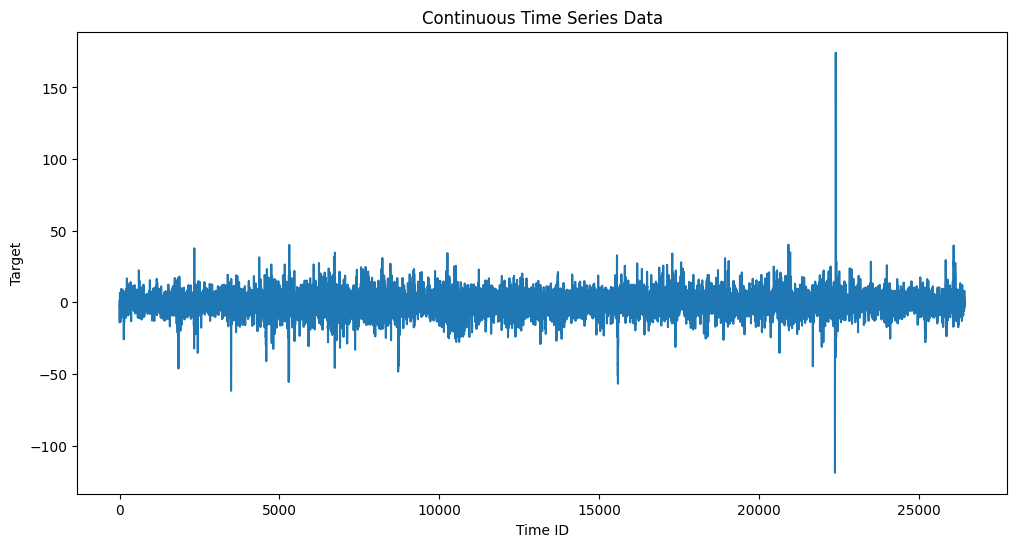

In [54]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(stock_52['time_id'], stock_52['target'])
plt.title('Continuous Time Series Data')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
# Check Stationarity (Dickey-Fuller test)
result = adfuller(stock_52['target'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -26.241536507089812
p-value: 0.0


A negative value means the data is stationary

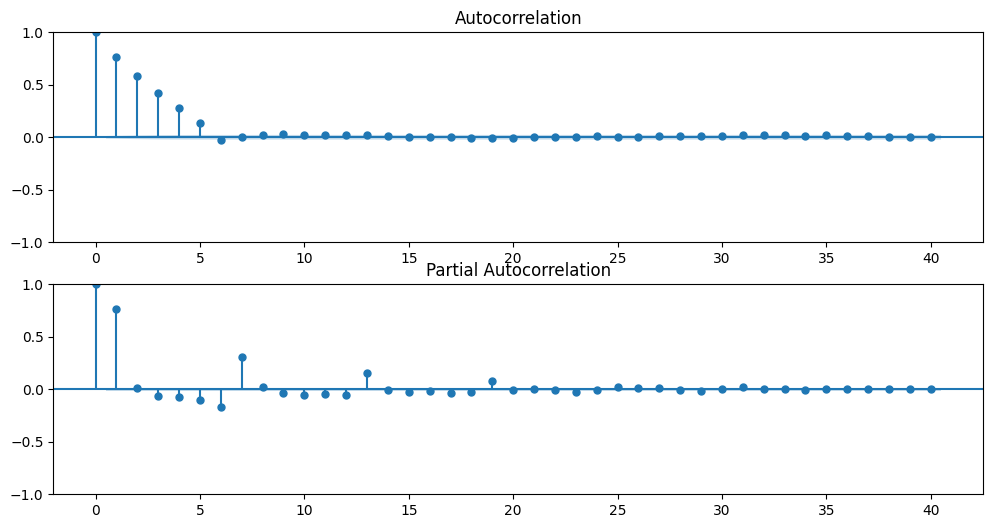

In [57]:
# ACF and PACF analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(stock_52['target'], lags=40, ax=ax1)
plot_pacf(stock_52['target'], lags=40, ax=ax2)
plt.show()

Consider
q = 5
p = 1

In [58]:
# Select p and q values
p = 1
d = 1
q = 1

In [60]:
# Fit the ARIMA model
model = ARIMA(stock_52['target'], order=(p, d, q))
model_fit = model.fit()

In [ ]:
# Model Evaluation

In [62]:
# Step 8: Forecast the next 6 steps
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
print(f'Forecasted Values for Next {forecast_steps} Steps: {forecast}')

Forecasted Values for Next 6 Steps: 26455   -2.183828
26456   -1.669566
26457   -1.278348
26458   -0.980733
26459   -0.754326
26460   -0.582089
Name: predicted_mean, dtype: float64
